In [2]:
import pandas as pd
import numpy as np
filename = "https://raw.githubusercontent.com/jtopor/DAV-5400/master/Project1/hflights.csv"
fd = pd.read_csv(filename)

In [20]:
fd.dtypes

Year                   int64
Month                  int64
DayofMonth             int64
DayOfWeek              int64
DepTime              float64
ArrTime              float64
UniqueCarrier         object
FlightNum              int64
TailNum               object
ActualElapsedTime    float64
AirTime              float64
ArrDelay             float64
DepDelay             float64
Origin                object
Dest                  object
Distance               int64
TaxiIn               float64
TaxiOut              float64
Cancelled              int64
CancellationCode      object
Diverted               int64
dtype: object

### Create Date Column:

In [21]:
# Change name of DayofMonth to Day to be compatible with to_datetime
fd = fd.rename(index=str, columns={"DayofMonth": "Day"})

In [22]:
# Create new Date column using Year, Month and Day columns
fd['Date'] = pd.to_datetime(fd[['Year','Month','Day']])

In [23]:
# Change new Date column data type to datetime
fd.Date = pd.to_datetime(fd.Date)

#fd.dtypes

In [24]:
# Place new Date column in 0 index before all columns
cols = fd.columns.tolist()
cols.insert(0, cols.pop(cols.index('Date')))
#cols

In [25]:
# Derive new date_flights data frame
date_flights = fd.reindex(columns= cols)

In [26]:
date_flights.head()

,Date,Year,Month,Day,DayOfWeek,DepTime,ArrTime,UniqueCarrier,FlightNum,TailNum,...,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted
0,2011-01-01,2011,1,1,6,1400.0,1500.0,AA,428,N576AA,...,-10.0,0.0,IAH,DFW,224,7.0,13.0,0,NaN,0
1,2011-01-02,2011,1,2,7,1401.0,1501.0,AA,428,N557AA,...,-9.0,1.0,IAH,DFW,224,6.0,9.0,0,NaN,0
2,2011-01-03,2011,1,3,1,1352.0,1502.0,AA,428,N541AA,...,-8.0,-8.0,IAH,DFW,224,5.0,17.0,0,NaN,0
3,2011-01-04,2011,1,4,2,1403.0,1513.0,AA,428,N403AA,...,3.0,3.0,IAH,DFW,224,9.0,22.0,0,NaN,0
4,2011-01-05,2011,1,5,3,1405.0,1507.0,AA,428,N492AA,...,-3.0,5.0,IAH,DFW,224,9.0,9.0,0,NaN,0


### Exploritory Data:

#### How many Origin and Dest Airports, TailNum, and Unique Carriers are in this dataset?

In [41]:
# Airports
Origin = date_flights['Origin'].unique()
Dest = date_flights['Dest'].unique()

#print("Origin Aiports: ", Origin)
print("Count of Origin Airports: ", len(Origin))
#print("Destination Airports: ", Dest)
print("Count of Destination Airports: ", len(Dest))

Count of Origin Airports:  2
Count of Destination Airports:  106


In [45]:
# TailNum
TailNum = date_flights['TailNum'].unique()

#print("Tail numbers: ", TailNum)
print("Count of Tailnumbers: ", len(TailNum))

Tail numbers:  ['N576AA' 'N557AA' 'N541AA' ... 'N273JB' 'N198JB' 'N59053']
Count of Tailnumbers:  2031


In [51]:
# Carriers
Carriers = date_flights['UniqueCarrier'].unique()
print("Carriers: ", Carriers)
print("Count of Carriers: ", len(Carriers))

Carriers:  ['AA' 'AS' 'B6' 'CO' 'DL' 'OO' 'UA' 'US' 'WN' 'EV' 'F9' 'FL' 'MQ' 'XE']
Count of Carriers:  14


#### (1) Which Carrier has the most flights?

In [69]:
AA = len(date_flights[(date_flights.UniqueCarrier == 'AA')])
AS = len(date_flights[(date_flights.UniqueCarrier == 'AS')])
B6 = len(date_flights[(date_flights.UniqueCarrier == 'B6')])
CO = len(date_flights[(date_flights.UniqueCarrier == 'CO')])
DL = len(date_flights[(date_flights.UniqueCarrier == 'DL')])
OO = len(date_flights[(date_flights.UniqueCarrier == 'OO')])
UA = len(date_flights[(date_flights.UniqueCarrier == 'UA')])
US = len(date_flights[(date_flights.UniqueCarrier == 'US')])
WN = len(date_flights[(date_flights.UniqueCarrier == 'WN')])
EV = len(date_flights[(date_flights.UniqueCarrier == 'EV')])
F9 = len(date_flights[(date_flights.UniqueCarrier == 'F9')])
FL = len(date_flights[(date_flights.UniqueCarrier == 'FL')])
MQ = len(date_flights[(date_flights.UniqueCarrier == 'MQ')])
XE = len(date_flights[(date_flights.UniqueCarrier == 'XE')])

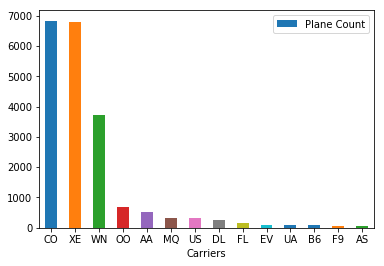

In [75]:
plane_count = len(TailNum)
Planes = {"Carriers":['AA', 'AS', 'B6', 'CO', 'DL', 'OO', 'UA', 'US', 'WN', 'EV', 'F9', 'FL', 'MQ', 'XE'],
         "Plane Count": [AA, AS, B6, CO, DL, OO, UA, US, WN, EV, F9, FL, MQ, XE]}

Carrier_Planes = pd.DataFrame(Planes)
Carrier_Planes = Carrier_Planes.sort_values(by="Plane Count", ascending = False)
#Carrier_Planes

ax = Carrier_Planes.plot.bar(x='Carriers', y='Plane Count', rot=0)

#### (2) Out of the two carriers with the most flights, which Carrier Has the lowest average delay?

In [146]:
# Create new column for Total Delay time by adding ArrDelay and DepDelay
date_flights['Total_Delay'] = date_flights.ArrDelay + date_flights.DepDelay
# Place new Total Delay column in 8 index between AirTime and ArrDelay
cols = date_flights.columns.tolist()
cols.insert(8, cols.pop(cols.index('Total_Delay')))
date_flights = date_flights.reindex(columns= cols)

In [151]:
Carrier_Delay = date_flights[['UniqueCarrier', 'Total_Delay']]

CO_Delay = Carrier_Delay[(Carrier_Delay.UniqueCarrier == "CO") & (Carrier_Delay.Total_Delay > 0)]
#CO_Delay.head()
count = len(CO_Delay)
#Carriers = Carrier_Delay['UniqueCarrier'].unique()
#Carriers

# Average CO Delay Time
CO_Delay = CO_Delay['Total_Delay'].sum()
Average_CO_Delay = CO_Delay/count
print("CO Average Delay: ", Average_CO_Delay, "Minutes")

CO Average Delay:  36.706454226302995 Minutes


In [152]:
XE_Delay = Carrier_Delay[(Carrier_Delay.UniqueCarrier == "XE") & (Carrier_Delay.Total_Delay > 0)]
XE_Delay.head()

count = len(XE_Delay)
#Carriers = Carrier_Delay['UniqueCarrier'].unique()
#Carriers

# Average XE Delay Time
XE_Delay = XE_Delay['Total_Delay'].sum()
Average_XE_Delay = XE_Delay/count
print("XE Average Delay: ", Average_XE_Delay, "Minutes")

XE Average Delay:  31.877608772550406 Minutes


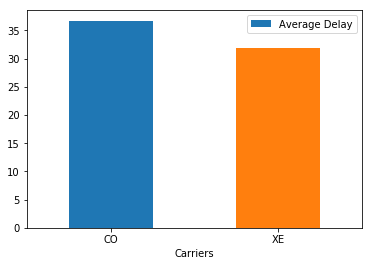

In [153]:
plane_count = len(TailNum)
Delays = {"Carriers":['CO', 'XE'],
         "Average Delay": [Average_CO_Delay, Average_XE_Delay]}

Carrier_Planes = pd.DataFrame(Delays)
Carrier_Planes = Carrier_Planes.sort_values(by="Average Delay", ascending = False)
#Carrier_Planes

ax = Carrier_Planes.plot.bar(x='Carriers', y='Average Delay', rot=0)

#### (3) Which airport has more departing flights?

In [136]:
flights_data.Origin.unique()
flights_data.Origin.unique()

HOU_flights = flights_data[(flights_data.Origin == 'HOU')]
IAH_flights = flights_data[(flights_data.Origin == 'IAH')]

print("HOU flights: ", len(HOU_flights))
print("IAH flights: ", len(IAH_flights))

HOU flights:  4319
IAH flights:  15681
